In [1]:
import pandas as pd
import numpy as np
pd.DataFrame.iteritems = pd.DataFrame.items
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

/home/ahmed/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("../../../data/datasets_merged/df_mergedFinal.csv")
df

,Country,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Annee_Souverainete,Nb_Univtop500,Mean_Rank_Univ,Political_Regime,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,...,Averageiqbycountry_Iqlynnbecker2019,Averageiqbycountry_Sourcelynnbecker2019,Averageiq_Ici2017Grade,Averageiq_Ici2017Score,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
0,Afghanistan,4.500000,574.000000,0.0,1919.0,0.0,NaN,1.0,144098.0,5853838.0,...,82.12,E,NaN,NaN,368.0,358.0,376.0,346.873954,3.303561,NaN
1,Albania,4.530769,659.500000,0.0,1912.0,0.0,NaN,1.0,48810.0,1250451.0,...,81.75,E,D+,23.4,NaN,NaN,NaN,6455.209751,57.635801,NaN
2,Algeria,4.350000,184.000000,2.0,1962.0,0.0,NaN,1.0,250378.0,2022337.0,...,76.00,E,D,19.1,378.0,401.0,406.0,3640.548936,58.718531,NaN
3,Andorra,4.504762,201.476190,0.0,NaN,0.0,NaN,NaN,45574.0,11132.0,...,95.20,E,NaN,NaN,NaN,NaN,NaN,41655.939232,NaN,NaN
4,Angola,4.205263,98.947368,0.0,1975.0,0.0,NaN,1.0,656434.0,668066.0,...,75.10,T,NaN,NaN,487.0,498.0,507.0,1868.699719,38.136729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Venezuela,4.340741,372.740741,1.0,1811.0,0.0,NaN,1.0,1324193.0,5415337.0,...,82.99,T,C-,26.8,NaN,NaN,NaN,17043.477492,80.016326,NaN
193,Vietnam,0.000000,0.000000,1.0,1945.0,0.0,NaN,0.0,76767.0,3392025.0,...,89.53,T,C-,25.1,NaN,NaN,NaN,3728.987606,47.202375,NaN
194,Yemen,4.280000,48.250000,1.0,1990.0,0.0,NaN,0.0,387113.0,1301166.0,...,62.86,T,NaN,NaN,NaN,NaN,NaN,641.196791,18.858729,NaN
195,Zambia,3.975000,288.250000,0.0,1964.0,0.0,NaN,1.0,187955.0,200700.0,...,68.43,E,D,18.9,NaN,NaN,NaN,1103.845323,18.397422,NaN


In [4]:
numerical_columns = df.select_dtypes(include=['number'])
ds=numerical_columns.drop(columns=['Annee_Souverainete','Break_1','Break_2', 'Break_3', 'Break_4', 'Break_5','Political_Regime','Mean_Rank_Univ','Averageiq_Ici2017Score'])
ds

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Primary,Lower_Secondary,End_Of_The_School_Year_Break,Literacy_Rate_2021,...,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
0,4.500000,574.000000,0.0,0.0,144098.0,5853838.0,NaN,NaN,NaN,37.27,...,41128771.0,NaN,1.426650e+10,82.12,368.0,358.0,376.0,346.873954,3.303561,NaN
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,NaN,NaN,NaN,NaN,...,2777689.0,3.09,1.793057e+10,81.75,NaN,NaN,NaN,6455.209751,57.635801,NaN
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,NaN,NaN,NaN,NaN,...,44903225.0,6.30,1.634724e+11,76.00,378.0,401.0,406.0,3640.548936,58.718531,NaN
3,4.504762,201.476190,0.0,0.0,45574.0,11132.0,NaN,NaN,NaN,NaN,...,79824.0,2.58,3.325144e+09,95.20,NaN,NaN,NaN,41655.939232,NaN,NaN
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,NaN,NaN,NaN,NaN,...,35588987.0,2.30,6.650513e+10,75.10,487.0,498.0,507.0,1868.699719,38.136729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,4.340741,372.740741,1.0,0.0,1324193.0,5415337.0,NaN,NaN,NaN,NaN,...,28301696.0,NaN,4.823593e+11,82.99,NaN,NaN,NaN,17043.477492,80.016326,NaN
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,NaN,NaN,NaN,NaN,...,98186856.0,2.95,3.661376e+11,89.53,NaN,NaN,NaN,3728.987606,47.202375,NaN
194,4.280000,48.250000,1.0,0.0,387113.0,1301166.0,NaN,NaN,NaN,NaN,...,33696614.0,NaN,2.160616e+10,62.86,NaN,NaN,NaN,641.196791,18.858729,NaN
195,3.975000,288.250000,0.0,0.0,187955.0,200700.0,NaN,NaN,NaN,NaN,...,20017675.0,3.11,2.209642e+10,68.43,NaN,NaN,NaN,1103.845323,18.397422,NaN


In [5]:
#garder que les variables dont au moins 100 valeurs sont renseignées:

colonnes=list(ds.describe().columns[ds.describe().loc['count'] > 100])
colonnes

['Notes_Musees',
 'Nbvotes_Musees_Clean',
 'Nb_Prixnobel',
 'Nb_Univtop500',
 'Immigrationbycountry_Immigrants',
 'Immigrationbycountry_Emigrants',
 'Area',
 'Population',
 'Education_Spending_2021',
 'Gdp',
 'Averageiqbycountry_Iqlynnbecker2019',
 'Gdp_Percapita',
 'Indice_Evolution']

In [6]:
ds=ds[colonnes].dropna()
ds

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Gdp_Percapita,Indice_Evolution
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,28748.0,2777689.0,3.09,1.793057e+10,81.75,6455.209751,57.635801
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,2381741.0,44903225.0,6.30,1.634724e+11,76.00,3640.548936,58.718531
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,1246700.0,35588987.0,2.30,6.650513e+10,75.10,1868.699719,38.136729
6,4.585185,12605.000000,5.0,1.0,2281728.0,1076148.0,2780400.0,46234830.0,4.65,4.879026e+11,86.63,10552.706091,49.311711
7,4.703704,223.592593,1.0,0.0,190349.0,958190.0,29743.0,2780469.0,2.77,1.387891e+10,88.82,4991.571073,146.810914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,4.662963,26222.222222,137.0,49.0,9359587.0,4732510.0,243610.0,66971395.0,5.33,3.141506e+12,99.12,46908.178583,147.975327
189,4.540741,1484.518519,0.0,0.0,108267.0,367060.0,176215.0,3422794.0,4.41,6.141227e+10,87.59,17942.145583,90.161536
190,4.450000,189.583333,0.0,0.0,1162007.0,2027823.0,447400.0,35648100.0,5.37,6.960061e+10,89.01,1952.435473,59.164711
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,331340.0,98186856.0,2.95,3.661376e+11,89.53,3728.987606,47.202375


In [7]:
X = ds.drop(columns=['Averageiqbycountry_Iqlynnbecker2019'])  # Sélectionner toutes les colonnes sauf la colonne des labels
y = ds['Averageiqbycountry_Iqlynnbecker2019']  # Sélectionner uniquement la colonne des labels

In [8]:
X #TODO: one hot encoding des variables categorielles

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,28748.0,2777689.0,3.09,1.793057e+10,6455.209751,57.635801
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,2381741.0,44903225.0,6.30,1.634724e+11,3640.548936,58.718531
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,1246700.0,35588987.0,2.30,6.650513e+10,1868.699719,38.136729
6,4.585185,12605.000000,5.0,1.0,2281728.0,1076148.0,2780400.0,46234830.0,4.65,4.879026e+11,10552.706091,49.311711
7,4.703704,223.592593,1.0,0.0,190349.0,958190.0,29743.0,2780469.0,2.77,1.387891e+10,4991.571073,146.810914
...,...,...,...,...,...,...,...,...,...,...,...,...
187,4.662963,26222.222222,137.0,49.0,9359587.0,4732510.0,243610.0,66971395.0,5.33,3.141506e+12,46908.178583,147.975327
189,4.540741,1484.518519,0.0,0.0,108267.0,367060.0,176215.0,3422794.0,4.41,6.141227e+10,17942.145583,90.161536
190,4.450000,189.583333,0.0,0.0,1162007.0,2027823.0,447400.0,35648100.0,5.37,6.960061e+10,1952.435473,59.164711
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,331340.0,98186856.0,2.95,3.661376e+11,3728.987606,47.202375


In [9]:
y

1      81.75
2      76.00
4      75.10
6      86.63
7      88.82
       ...  
187    99.12
189    87.59
190    89.01
193    89.53
195    68.43
Name: Averageiqbycountry_Iqlynnbecker2019, Length: 115, dtype: float64

In [10]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'fit_intercept': [True, False]
}

# Créer une instance du modèle de régression linéaire
linear_regression = LinearRegression()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test:", mse)

Meilleurs paramètres: {'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test: 162.88807776076075


In [11]:
from sklearn.linear_model import Ridge, Lasso

# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Méthodes de résolution
}

# Créer une instance de GridSearchCV pour la régularisation Ridge
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Ridge
ridge_grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Ridge
print("Meilleurs paramètres (Ridge):", ridge_grid_search.best_params_)

param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False]
}
# Créer une instance de GridSearchCV pour la régularisation Lasso
lasso = Lasso()
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Lasso
lasso_grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Lasso
print("Meilleurs paramètres (Lasso):", lasso_grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Ridge
best_ridge_model = ridge_grid_search.best_estimator_
ridge_y_pred = best_ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Ridge):", ridge_mse)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Lasso
best_lasso_model = lasso_grid_search.best_estimator_
lasso_y_pred = best_lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Lasso):", lasso_mse)

Meilleurs paramètres (Ridge): {'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}
Meilleurs paramètres (Lasso): {'alpha': 1.0, 'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test (Ridge): 162.827883880574
Erreur quadratique moyenne (MSE) sur les données de test (Lasso): 155.8702395854182


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error

# Calcul du coefficient de détermination (R²)
lasso_r2_score = r2_score(y_test, lasso_y_pred)
print("Coefficient de détermination (R²) sur les données de test (Lasso):", lasso_r2_score)

# Calcul de l'erreur absolue moyenne (MAE)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print("Erreur absolue moyenne (MAE) sur les données de test (Lasso):", lasso_mae)

# Calcul de l'erreur quadratique moyenne logarithmique (MSLE)
lasso_msle = mean_squared_log_error(y_test, lasso_y_pred)
print("Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Lasso):", lasso_msle)

Coefficient de détermination (R²) sur les données de test (Lasso): -0.1812969529512951
Erreur absolue moyenne (MAE) sur les données de test (Lasso): 10.801245597305709
Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Lasso): 0.023001061720716587


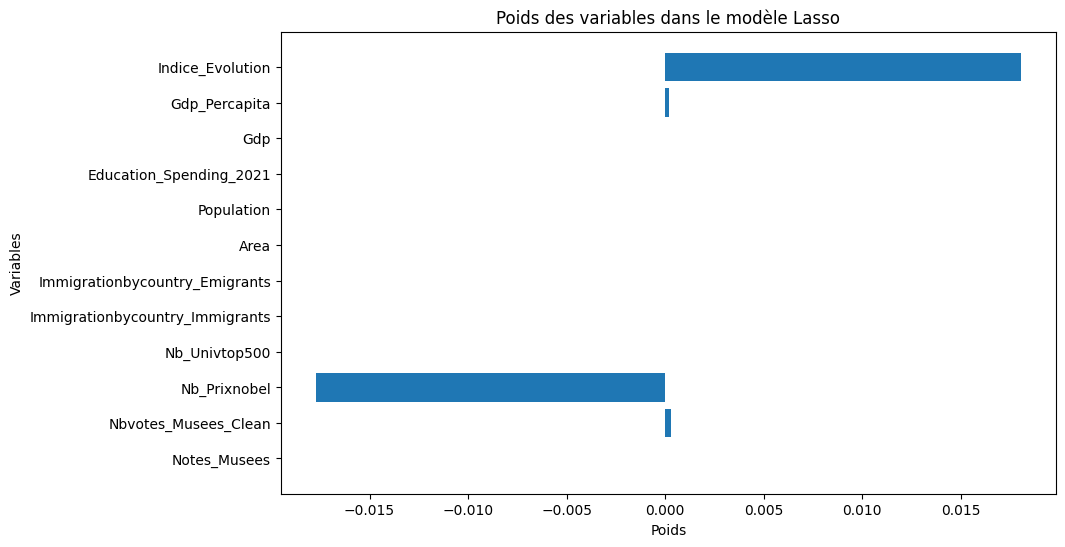

In [13]:
import matplotlib.pyplot as plt

# Récupérer les coefficients du modèle Lasso
lasso_coefficients = best_lasso_model.coef_

# Noms des variables
variables_names = list(X_test.columns)

# Créer un graphique pour visualiser les poids des variables
plt.figure(figsize=(10, 6))
plt.barh(variables_names, lasso_coefficients)
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.title('Poids des variables dans le modèle Lasso')
plt.show()


# Données normalisées

In [14]:
from sklearn.preprocessing import StandardScaler

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'fit_intercept': [True, False]
}

# Créer une instance du modèle de régression linéaire
linear_regression = LinearRegression()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test:", mse)

Meilleurs paramètres: {'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test: 162.88807785498878


In [16]:
# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Méthodes de résolution
}

# Créer une instance de GridSearchCV pour la régularisation Ridge
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Ridge
ridge_grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Ridge
print("Meilleurs paramètres (Ridge):", ridge_grid_search.best_params_)

param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False]
}
# Créer une instance de GridSearchCV pour la régularisation Lasso
lasso = Lasso()
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Lasso
lasso_grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Lasso
print("Meilleurs paramètres (Lasso):", lasso_grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Ridge
best_ridge_model = ridge_grid_search.best_estimator_
ridge_y_pred = best_ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Ridge):", ridge_mse)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Lasso
best_lasso_model = lasso_grid_search.best_estimator_
lasso_y_pred = best_lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Lasso):", lasso_mse)

Meilleurs paramètres (Ridge): {'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}
Meilleurs paramètres (Lasso): {'alpha': 0.5, 'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test (Ridge): 130.4240906576426
Erreur quadratique moyenne (MSE) sur les données de test (Lasso): 166.67086413732017


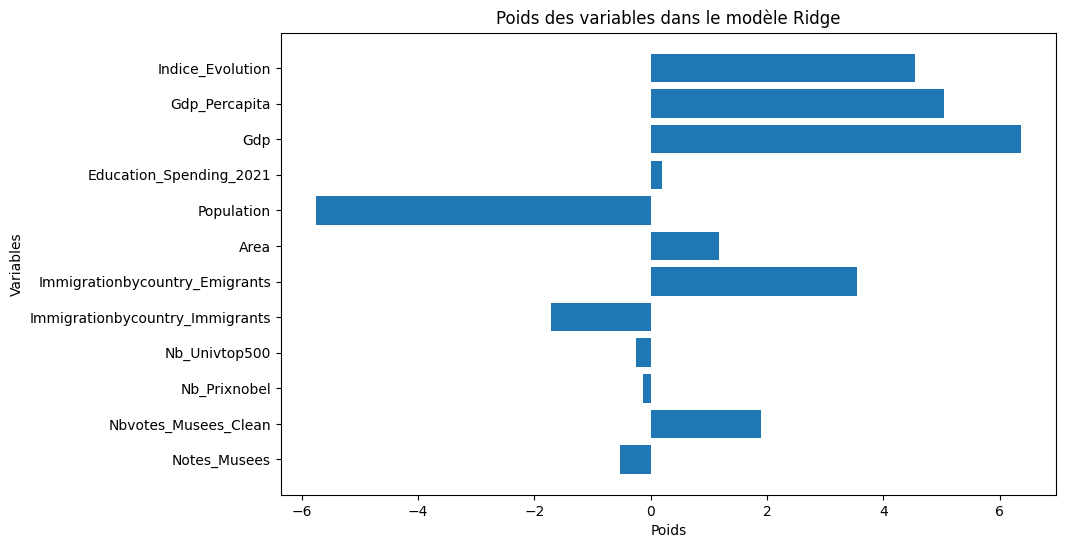

In [17]:
import matplotlib.pyplot as plt

# Récupérer les coefficients du modèle Ridge
ridge_coefficients = best_ridge_model.coef_

# Noms des variables
variables_names = list(X_test.columns)

# Créer un graphique pour visualiser les poids des variables
plt.figure(figsize=(10, 6))
plt.barh(variables_names, ridge_coefficients)
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.title('Poids des variables dans le modèle Ridge')
plt.show()


In [18]:
# Calcul du coefficient de détermination (R²)
ridge_r2_score = r2_score(y_test, ridge_y_pred)
print("Coefficient de détermination (R²) sur les données de test (Ridge):", ridge_r2_score)

# Calcul de l'erreur absolue moyenne (MAE)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print("Erreur absolue moyenne (MAE) sur les données de test (Ridge):", ridge_mae)

# Calcul de l'erreur quadratique moyenne logarithmique (MSLE)
ridge_msle = mean_squared_log_error(y_test, ridge_y_pred)
print("Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Ridge):", ridge_msle)

Coefficient de détermination (R²) sur les données de test (Ridge): 0.011552293143905601
Erreur absolue moyenne (MAE) sur les données de test (Ridge): 9.741338351482053
Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Ridge): 0.01700362607017313


# Réseaux de neurones

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Définir le nombre de couches et le nombre de neurones par couche comme des variables globales
nb_couches = 1
nb_neurones_par_couche = 5

# Créer une classe pour le modèle
class Regressor(nn.Module):
    def __init__(self, input_size=12,nb_neurones_par_couche=5,nb_couches=1):
        super(Regressor, self).__init__()
        layers = []
        for _ in range(nb_couches):
            layers.append(nn.Linear(input_size, nb_neurones_par_couche))
            layers.append(nn.ReLU(inplace=True))
            input_size = nb_neurones_par_couche
        layers.append(nn.Linear(input_size, 1))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Créer une instance du modèle
input_size = len(X_train_scaled[0])
model = Regressor(input_size)

In [20]:
# Définir la fonction de perte et l'optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convertir les données en tensors PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(list(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(list(y_test), dtype=torch.float32)

# Créer des DataLoader pour gérer les données
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize variables to track the best test loss and corresponding model state
best_test_loss = float('inf')
best_model_state = None
best_epoch = 0

# Entraîner le modèle
num_epochs = 10000
losses = []
test_losses = []

for epoch in range(num_epochs):
    i = 0
    losses_avg = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        i += 1
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))  
        losses_avg += loss.item()
        loss.backward()  
        optimizer.step()
    losses.append(losses_avg / i)
    
    # Évaluation sur les données de test après chaque époque
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
        test_losses.append(test_loss.item())
        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')
        
        # Check if the current test loss is the best one so far
        if test_loss.item() < best_test_loss:
            best_test_loss = test_loss.item()
            best_model_state = model.state_dict()
            best_epoch = epoch + 1

# Save the best model state to a file
if best_model_state is not None:
    torch.save(best_model_state, 'best_model.pth')
    print(f'Best model saved with Test Loss: {best_test_loss:.4f} at epoch {best_epoch}')

Epoch [1/10000], Test Loss: 8088.4819
Epoch [2/10000], Test Loss: 8085.6323
Epoch [3/10000], Test Loss: 8082.7202
Epoch [4/10000], Test Loss: 8079.9395
Epoch [5/10000], Test Loss: 8077.1055
Epoch [6/10000], Test Loss: 8074.2622
Epoch [7/10000], Test Loss: 8071.3574
Epoch [8/10000], Test Loss: 8068.6284
Epoch [9/10000], Test Loss: 8066.0410
Epoch [10/10000], Test Loss: 8063.2969
Epoch [11/10000], Test Loss: 8060.7173
Epoch [12/10000], Test Loss: 8058.2266
Epoch [13/10000], Test Loss: 8055.5312
Epoch [14/10000], Test Loss: 8052.5913
Epoch [15/10000], Test Loss: 8049.6294
Epoch [16/10000], Test Loss: 8046.4077
Epoch [17/10000], Test Loss: 8042.9712
Epoch [18/10000], Test Loss: 8039.6118
Epoch [19/10000], Test Loss: 8036.1733
Epoch [20/10000], Test Loss: 8032.6289
Epoch [21/10000], Test Loss: 8029.1069
Epoch [22/10000], Test Loss: 8025.5522
Epoch [23/10000], Test Loss: 8021.9375
Epoch [24/10000], Test Loss: 8018.3149
Epoch [25/10000], Test Loss: 8014.7241
Epoch [26/10000], Test Loss: 8011.

Epoch [214/10000], Test Loss: 6081.4810
Epoch [215/10000], Test Loss: 6066.4829
Epoch [216/10000], Test Loss: 6051.3188
Epoch [217/10000], Test Loss: 6036.6079
Epoch [218/10000], Test Loss: 6022.3257
Epoch [219/10000], Test Loss: 6009.2163
Epoch [220/10000], Test Loss: 5996.4272
Epoch [221/10000], Test Loss: 5983.6597
Epoch [222/10000], Test Loss: 5970.9653
Epoch [223/10000], Test Loss: 5958.1011
Epoch [224/10000], Test Loss: 5945.2095
Epoch [225/10000], Test Loss: 5932.2124
Epoch [226/10000], Test Loss: 5919.4380
Epoch [227/10000], Test Loss: 5906.5825
Epoch [228/10000], Test Loss: 5893.2622
Epoch [229/10000], Test Loss: 5879.9883
Epoch [230/10000], Test Loss: 5866.6094
Epoch [231/10000], Test Loss: 5853.3965
Epoch [232/10000], Test Loss: 5840.3462
Epoch [233/10000], Test Loss: 5827.6812
Epoch [234/10000], Test Loss: 5814.6860
Epoch [235/10000], Test Loss: 5801.9448
Epoch [236/10000], Test Loss: 5789.3335
Epoch [237/10000], Test Loss: 5777.0312
Epoch [238/10000], Test Loss: 5764.3774


Epoch [433/10000], Test Loss: 2658.8472
Epoch [434/10000], Test Loss: 2643.4121
Epoch [435/10000], Test Loss: 2628.1599
Epoch [436/10000], Test Loss: 2612.8132
Epoch [437/10000], Test Loss: 2597.7102
Epoch [438/10000], Test Loss: 2582.6128
Epoch [439/10000], Test Loss: 2568.1477
Epoch [440/10000], Test Loss: 2553.4136
Epoch [441/10000], Test Loss: 2538.5222
Epoch [442/10000], Test Loss: 2523.6921
Epoch [443/10000], Test Loss: 2508.6565
Epoch [444/10000], Test Loss: 2493.7507
Epoch [445/10000], Test Loss: 2478.9319
Epoch [446/10000], Test Loss: 2464.0571
Epoch [447/10000], Test Loss: 2449.8484
Epoch [448/10000], Test Loss: 2435.4700
Epoch [449/10000], Test Loss: 2421.3074
Epoch [450/10000], Test Loss: 2407.0596
Epoch [451/10000], Test Loss: 2393.1479
Epoch [452/10000], Test Loss: 2379.3210
Epoch [453/10000], Test Loss: 2365.3069
Epoch [454/10000], Test Loss: 2351.2280
Epoch [455/10000], Test Loss: 2337.3528
Epoch [456/10000], Test Loss: 2323.5457
Epoch [457/10000], Test Loss: 2309.5388


Epoch [643/10000], Test Loss: 916.9861
Epoch [644/10000], Test Loss: 914.8774
Epoch [645/10000], Test Loss: 912.8605
Epoch [646/10000], Test Loss: 910.6779
Epoch [647/10000], Test Loss: 908.6058
Epoch [648/10000], Test Loss: 906.4454
Epoch [649/10000], Test Loss: 904.3267
Epoch [650/10000], Test Loss: 902.3282
Epoch [651/10000], Test Loss: 900.2803
Epoch [652/10000], Test Loss: 898.1687
Epoch [653/10000], Test Loss: 896.1954
Epoch [654/10000], Test Loss: 894.4282
Epoch [655/10000], Test Loss: 892.8383
Epoch [656/10000], Test Loss: 891.1149
Epoch [657/10000], Test Loss: 889.3643
Epoch [658/10000], Test Loss: 887.7831
Epoch [659/10000], Test Loss: 886.2018
Epoch [660/10000], Test Loss: 884.6465
Epoch [661/10000], Test Loss: 883.1760
Epoch [662/10000], Test Loss: 881.7416
Epoch [663/10000], Test Loss: 880.6151
Epoch [664/10000], Test Loss: 879.4021
Epoch [665/10000], Test Loss: 877.9116
Epoch [666/10000], Test Loss: 876.2214
Epoch [667/10000], Test Loss: 874.4783
Epoch [668/10000], Test L

Epoch [877/10000], Test Loss: 892.6096
Epoch [878/10000], Test Loss: 893.3371
Epoch [879/10000], Test Loss: 894.1840
Epoch [880/10000], Test Loss: 895.1785
Epoch [881/10000], Test Loss: 896.3604
Epoch [882/10000], Test Loss: 896.4509
Epoch [883/10000], Test Loss: 896.5649
Epoch [884/10000], Test Loss: 896.5298
Epoch [885/10000], Test Loss: 895.8668
Epoch [886/10000], Test Loss: 895.8553
Epoch [887/10000], Test Loss: 895.9805
Epoch [888/10000], Test Loss: 896.1484
Epoch [889/10000], Test Loss: 897.2193
Epoch [890/10000], Test Loss: 898.0576
Epoch [891/10000], Test Loss: 898.8825
Epoch [892/10000], Test Loss: 899.7388
Epoch [893/10000], Test Loss: 901.2935
Epoch [894/10000], Test Loss: 902.9595
Epoch [895/10000], Test Loss: 904.1721
Epoch [896/10000], Test Loss: 905.2166
Epoch [897/10000], Test Loss: 906.4747
Epoch [898/10000], Test Loss: 907.4933
Epoch [899/10000], Test Loss: 908.4595
Epoch [900/10000], Test Loss: 909.0115
Epoch [901/10000], Test Loss: 909.0816
Epoch [902/10000], Test L

Epoch [1096/10000], Test Loss: 983.6909
Epoch [1097/10000], Test Loss: 982.8259
Epoch [1098/10000], Test Loss: 981.8348
Epoch [1099/10000], Test Loss: 980.6730
Epoch [1100/10000], Test Loss: 979.2603
Epoch [1101/10000], Test Loss: 977.1473
Epoch [1102/10000], Test Loss: 975.2053
Epoch [1103/10000], Test Loss: 973.9545
Epoch [1104/10000], Test Loss: 973.5588
Epoch [1105/10000], Test Loss: 972.7305
Epoch [1106/10000], Test Loss: 971.3796
Epoch [1107/10000], Test Loss: 971.1521
Epoch [1108/10000], Test Loss: 970.6857
Epoch [1109/10000], Test Loss: 970.2485
Epoch [1110/10000], Test Loss: 970.4764
Epoch [1111/10000], Test Loss: 970.4767
Epoch [1112/10000], Test Loss: 970.7725
Epoch [1113/10000], Test Loss: 971.3295
Epoch [1114/10000], Test Loss: 972.2485
Epoch [1115/10000], Test Loss: 972.7857
Epoch [1116/10000], Test Loss: 973.4112
Epoch [1117/10000], Test Loss: 974.2117
Epoch [1118/10000], Test Loss: 974.5899
Epoch [1119/10000], Test Loss: 974.3362
Epoch [1120/10000], Test Loss: 972.4594


Epoch [1307/10000], Test Loss: 948.8538
Epoch [1308/10000], Test Loss: 948.7025
Epoch [1309/10000], Test Loss: 948.7629
Epoch [1310/10000], Test Loss: 948.7752
Epoch [1311/10000], Test Loss: 948.6465
Epoch [1312/10000], Test Loss: 948.5114
Epoch [1313/10000], Test Loss: 948.0508
Epoch [1314/10000], Test Loss: 947.9956
Epoch [1315/10000], Test Loss: 947.8027
Epoch [1316/10000], Test Loss: 945.9730
Epoch [1317/10000], Test Loss: 944.5121
Epoch [1318/10000], Test Loss: 943.6242
Epoch [1319/10000], Test Loss: 944.0074
Epoch [1320/10000], Test Loss: 944.0673
Epoch [1321/10000], Test Loss: 942.9285
Epoch [1322/10000], Test Loss: 942.1468
Epoch [1323/10000], Test Loss: 941.8997
Epoch [1324/10000], Test Loss: 941.2625
Epoch [1325/10000], Test Loss: 941.2139
Epoch [1326/10000], Test Loss: 941.1193
Epoch [1327/10000], Test Loss: 940.1187
Epoch [1328/10000], Test Loss: 939.2322
Epoch [1329/10000], Test Loss: 938.6699
Epoch [1330/10000], Test Loss: 938.1457
Epoch [1331/10000], Test Loss: 938.4818


Epoch [1516/10000], Test Loss: 886.0795
Epoch [1517/10000], Test Loss: 884.6206
Epoch [1518/10000], Test Loss: 883.6524
Epoch [1519/10000], Test Loss: 883.2636
Epoch [1520/10000], Test Loss: 882.4659
Epoch [1521/10000], Test Loss: 881.2056
Epoch [1522/10000], Test Loss: 879.5270
Epoch [1523/10000], Test Loss: 878.2326
Epoch [1524/10000], Test Loss: 877.4741
Epoch [1525/10000], Test Loss: 876.5720
Epoch [1526/10000], Test Loss: 875.8788
Epoch [1527/10000], Test Loss: 874.8387
Epoch [1528/10000], Test Loss: 874.1821
Epoch [1529/10000], Test Loss: 873.3123
Epoch [1530/10000], Test Loss: 872.9269
Epoch [1531/10000], Test Loss: 873.1384
Epoch [1532/10000], Test Loss: 873.6685
Epoch [1533/10000], Test Loss: 872.9930
Epoch [1534/10000], Test Loss: 872.5864
Epoch [1535/10000], Test Loss: 872.1982
Epoch [1536/10000], Test Loss: 871.6094
Epoch [1537/10000], Test Loss: 871.2029
Epoch [1538/10000], Test Loss: 870.3208
Epoch [1539/10000], Test Loss: 870.1000
Epoch [1540/10000], Test Loss: 869.7578


Epoch [1748/10000], Test Loss: 760.0309
Epoch [1749/10000], Test Loss: 760.6797
Epoch [1750/10000], Test Loss: 761.9128
Epoch [1751/10000], Test Loss: 762.1570
Epoch [1752/10000], Test Loss: 762.2068
Epoch [1753/10000], Test Loss: 761.3638
Epoch [1754/10000], Test Loss: 760.6386
Epoch [1755/10000], Test Loss: 760.3953
Epoch [1756/10000], Test Loss: 760.2737
Epoch [1757/10000], Test Loss: 760.0634
Epoch [1758/10000], Test Loss: 759.1519
Epoch [1759/10000], Test Loss: 758.1013
Epoch [1760/10000], Test Loss: 757.2168
Epoch [1761/10000], Test Loss: 756.8558
Epoch [1762/10000], Test Loss: 756.8508
Epoch [1763/10000], Test Loss: 756.2116
Epoch [1764/10000], Test Loss: 755.6475
Epoch [1765/10000], Test Loss: 755.3732
Epoch [1766/10000], Test Loss: 754.9944
Epoch [1767/10000], Test Loss: 755.2065
Epoch [1768/10000], Test Loss: 755.4439
Epoch [1769/10000], Test Loss: 754.8592
Epoch [1770/10000], Test Loss: 754.2643
Epoch [1771/10000], Test Loss: 753.3320
Epoch [1772/10000], Test Loss: 752.3439


Epoch [1975/10000], Test Loss: 632.2982
Epoch [1976/10000], Test Loss: 632.1237
Epoch [1977/10000], Test Loss: 632.0908
Epoch [1978/10000], Test Loss: 630.8729
Epoch [1979/10000], Test Loss: 628.7376
Epoch [1980/10000], Test Loss: 627.0374
Epoch [1981/10000], Test Loss: 625.1912
Epoch [1982/10000], Test Loss: 623.0541
Epoch [1983/10000], Test Loss: 621.6518
Epoch [1984/10000], Test Loss: 619.9709
Epoch [1985/10000], Test Loss: 618.9028
Epoch [1986/10000], Test Loss: 618.3748
Epoch [1987/10000], Test Loss: 618.0009
Epoch [1988/10000], Test Loss: 616.8378
Epoch [1989/10000], Test Loss: 615.8449
Epoch [1990/10000], Test Loss: 615.2714
Epoch [1991/10000], Test Loss: 615.0896
Epoch [1992/10000], Test Loss: 614.9157
Epoch [1993/10000], Test Loss: 614.2758
Epoch [1994/10000], Test Loss: 613.2744
Epoch [1995/10000], Test Loss: 612.5731
Epoch [1996/10000], Test Loss: 612.4404
Epoch [1997/10000], Test Loss: 612.6808
Epoch [1998/10000], Test Loss: 613.1599
Epoch [1999/10000], Test Loss: 613.7709


Epoch [2184/10000], Test Loss: 555.0943
Epoch [2185/10000], Test Loss: 554.5690
Epoch [2186/10000], Test Loss: 554.3698
Epoch [2187/10000], Test Loss: 554.1890
Epoch [2188/10000], Test Loss: 553.4811
Epoch [2189/10000], Test Loss: 552.5032
Epoch [2190/10000], Test Loss: 552.0598
Epoch [2191/10000], Test Loss: 551.8431
Epoch [2192/10000], Test Loss: 551.4281
Epoch [2193/10000], Test Loss: 551.1795
Epoch [2194/10000], Test Loss: 551.0314
Epoch [2195/10000], Test Loss: 550.5569
Epoch [2196/10000], Test Loss: 549.8771
Epoch [2197/10000], Test Loss: 549.5045
Epoch [2198/10000], Test Loss: 549.6837
Epoch [2199/10000], Test Loss: 549.8397
Epoch [2200/10000], Test Loss: 550.1547
Epoch [2201/10000], Test Loss: 550.5087
Epoch [2202/10000], Test Loss: 550.5137
Epoch [2203/10000], Test Loss: 550.3376
Epoch [2204/10000], Test Loss: 550.1003
Epoch [2205/10000], Test Loss: 549.6679
Epoch [2206/10000], Test Loss: 549.5634
Epoch [2207/10000], Test Loss: 548.6702
Epoch [2208/10000], Test Loss: 548.6612


Epoch [2403/10000], Test Loss: 490.3424
Epoch [2404/10000], Test Loss: 489.4105
Epoch [2405/10000], Test Loss: 488.6853
Epoch [2406/10000], Test Loss: 487.9942
Epoch [2407/10000], Test Loss: 487.4836
Epoch [2408/10000], Test Loss: 486.9026
Epoch [2409/10000], Test Loss: 486.4323
Epoch [2410/10000], Test Loss: 486.1289
Epoch [2411/10000], Test Loss: 485.8581
Epoch [2412/10000], Test Loss: 485.5379
Epoch [2413/10000], Test Loss: 484.8789
Epoch [2414/10000], Test Loss: 484.0173
Epoch [2415/10000], Test Loss: 483.7212
Epoch [2416/10000], Test Loss: 483.2517
Epoch [2417/10000], Test Loss: 482.7094
Epoch [2418/10000], Test Loss: 481.7100
Epoch [2419/10000], Test Loss: 481.0658
Epoch [2420/10000], Test Loss: 479.8376
Epoch [2421/10000], Test Loss: 478.5460
Epoch [2422/10000], Test Loss: 478.1404
Epoch [2423/10000], Test Loss: 478.1821
Epoch [2424/10000], Test Loss: 478.2047
Epoch [2425/10000], Test Loss: 478.1045
Epoch [2426/10000], Test Loss: 478.1010
Epoch [2427/10000], Test Loss: 478.3617


Epoch [2627/10000], Test Loss: 433.8463
Epoch [2628/10000], Test Loss: 434.7770
Epoch [2629/10000], Test Loss: 435.4662
Epoch [2630/10000], Test Loss: 436.1093
Epoch [2631/10000], Test Loss: 436.3526
Epoch [2632/10000], Test Loss: 436.1428
Epoch [2633/10000], Test Loss: 435.8674
Epoch [2634/10000], Test Loss: 436.1210
Epoch [2635/10000], Test Loss: 436.2022
Epoch [2636/10000], Test Loss: 435.2718
Epoch [2637/10000], Test Loss: 435.5612
Epoch [2638/10000], Test Loss: 435.1033
Epoch [2639/10000], Test Loss: 434.4463
Epoch [2640/10000], Test Loss: 433.6527
Epoch [2641/10000], Test Loss: 432.7328
Epoch [2642/10000], Test Loss: 431.9432
Epoch [2643/10000], Test Loss: 431.3515
Epoch [2644/10000], Test Loss: 430.6749
Epoch [2645/10000], Test Loss: 429.7482
Epoch [2646/10000], Test Loss: 429.2477
Epoch [2647/10000], Test Loss: 428.3847
Epoch [2648/10000], Test Loss: 427.8347
Epoch [2649/10000], Test Loss: 427.6268
Epoch [2650/10000], Test Loss: 427.7329
Epoch [2651/10000], Test Loss: 427.4343


Epoch [2859/10000], Test Loss: 382.7674
Epoch [2860/10000], Test Loss: 382.2852
Epoch [2861/10000], Test Loss: 381.6722
Epoch [2862/10000], Test Loss: 380.6944
Epoch [2863/10000], Test Loss: 379.8796
Epoch [2864/10000], Test Loss: 379.0359
Epoch [2865/10000], Test Loss: 378.5582
Epoch [2866/10000], Test Loss: 378.5680
Epoch [2867/10000], Test Loss: 378.7635
Epoch [2868/10000], Test Loss: 379.0343
Epoch [2869/10000], Test Loss: 379.5410
Epoch [2870/10000], Test Loss: 380.4220
Epoch [2871/10000], Test Loss: 380.3915
Epoch [2872/10000], Test Loss: 379.9013
Epoch [2873/10000], Test Loss: 379.6448
Epoch [2874/10000], Test Loss: 378.8405
Epoch [2875/10000], Test Loss: 378.3810
Epoch [2876/10000], Test Loss: 378.1520
Epoch [2877/10000], Test Loss: 377.9932
Epoch [2878/10000], Test Loss: 377.6125
Epoch [2879/10000], Test Loss: 377.1629
Epoch [2880/10000], Test Loss: 376.6059
Epoch [2881/10000], Test Loss: 375.9132
Epoch [2882/10000], Test Loss: 375.4090
Epoch [2883/10000], Test Loss: 374.6245


Epoch [3091/10000], Test Loss: 335.9030
Epoch [3092/10000], Test Loss: 336.1654
Epoch [3093/10000], Test Loss: 335.7081
Epoch [3094/10000], Test Loss: 335.5901
Epoch [3095/10000], Test Loss: 335.4275
Epoch [3096/10000], Test Loss: 335.2042
Epoch [3097/10000], Test Loss: 335.1052
Epoch [3098/10000], Test Loss: 334.9482
Epoch [3099/10000], Test Loss: 334.8955
Epoch [3100/10000], Test Loss: 335.2386
Epoch [3101/10000], Test Loss: 335.2549
Epoch [3102/10000], Test Loss: 335.9689
Epoch [3103/10000], Test Loss: 336.1878
Epoch [3104/10000], Test Loss: 336.6136
Epoch [3105/10000], Test Loss: 336.4595
Epoch [3106/10000], Test Loss: 336.2421
Epoch [3107/10000], Test Loss: 335.8337
Epoch [3108/10000], Test Loss: 335.4397
Epoch [3109/10000], Test Loss: 334.9040
Epoch [3110/10000], Test Loss: 334.6681
Epoch [3111/10000], Test Loss: 333.8495
Epoch [3112/10000], Test Loss: 332.6834
Epoch [3113/10000], Test Loss: 331.6937
Epoch [3114/10000], Test Loss: 331.0271
Epoch [3115/10000], Test Loss: 330.5304


Epoch [3308/10000], Test Loss: 285.5974
Epoch [3309/10000], Test Loss: 285.5997
Epoch [3310/10000], Test Loss: 285.3624
Epoch [3311/10000], Test Loss: 285.6927
Epoch [3312/10000], Test Loss: 285.9083
Epoch [3313/10000], Test Loss: 285.8283
Epoch [3314/10000], Test Loss: 285.2496
Epoch [3315/10000], Test Loss: 284.9451
Epoch [3316/10000], Test Loss: 284.8072
Epoch [3317/10000], Test Loss: 284.9722
Epoch [3318/10000], Test Loss: 285.2429
Epoch [3319/10000], Test Loss: 285.7192
Epoch [3320/10000], Test Loss: 285.9062
Epoch [3321/10000], Test Loss: 285.9799
Epoch [3322/10000], Test Loss: 285.6884
Epoch [3323/10000], Test Loss: 285.2247
Epoch [3324/10000], Test Loss: 285.2273
Epoch [3325/10000], Test Loss: 285.1261
Epoch [3326/10000], Test Loss: 285.0915
Epoch [3327/10000], Test Loss: 284.2871
Epoch [3328/10000], Test Loss: 283.7593
Epoch [3329/10000], Test Loss: 282.9322
Epoch [3330/10000], Test Loss: 282.3915
Epoch [3331/10000], Test Loss: 282.1670
Epoch [3332/10000], Test Loss: 281.8800


Epoch [3519/10000], Test Loss: 249.5204
Epoch [3520/10000], Test Loss: 249.1621
Epoch [3521/10000], Test Loss: 248.4929
Epoch [3522/10000], Test Loss: 248.0660
Epoch [3523/10000], Test Loss: 247.8530
Epoch [3524/10000], Test Loss: 247.4383
Epoch [3525/10000], Test Loss: 246.8694
Epoch [3526/10000], Test Loss: 246.1740
Epoch [3527/10000], Test Loss: 245.4478
Epoch [3528/10000], Test Loss: 245.2107
Epoch [3529/10000], Test Loss: 245.0734
Epoch [3530/10000], Test Loss: 244.8501
Epoch [3531/10000], Test Loss: 245.0738
Epoch [3532/10000], Test Loss: 245.1881
Epoch [3533/10000], Test Loss: 245.4050
Epoch [3534/10000], Test Loss: 245.2224
Epoch [3535/10000], Test Loss: 244.9366
Epoch [3536/10000], Test Loss: 244.5068
Epoch [3537/10000], Test Loss: 244.2172
Epoch [3538/10000], Test Loss: 243.7283
Epoch [3539/10000], Test Loss: 242.9226
Epoch [3540/10000], Test Loss: 242.0261
Epoch [3541/10000], Test Loss: 241.3208
Epoch [3542/10000], Test Loss: 240.1647
Epoch [3543/10000], Test Loss: 240.0755


Epoch [3739/10000], Test Loss: 215.5635
Epoch [3740/10000], Test Loss: 215.6725
Epoch [3741/10000], Test Loss: 215.6466
Epoch [3742/10000], Test Loss: 215.6100
Epoch [3743/10000], Test Loss: 215.3486
Epoch [3744/10000], Test Loss: 214.8730
Epoch [3745/10000], Test Loss: 214.2534
Epoch [3746/10000], Test Loss: 214.0934
Epoch [3747/10000], Test Loss: 213.9113
Epoch [3748/10000], Test Loss: 213.7115
Epoch [3749/10000], Test Loss: 213.1049
Epoch [3750/10000], Test Loss: 212.4569
Epoch [3751/10000], Test Loss: 212.3396
Epoch [3752/10000], Test Loss: 212.4058
Epoch [3753/10000], Test Loss: 211.9969
Epoch [3754/10000], Test Loss: 211.9250
Epoch [3755/10000], Test Loss: 211.6503
Epoch [3756/10000], Test Loss: 211.2810
Epoch [3757/10000], Test Loss: 211.1324
Epoch [3758/10000], Test Loss: 211.0954
Epoch [3759/10000], Test Loss: 211.1960
Epoch [3760/10000], Test Loss: 211.8050
Epoch [3761/10000], Test Loss: 212.3461
Epoch [3762/10000], Test Loss: 212.5146
Epoch [3763/10000], Test Loss: 212.4034


Epoch [3966/10000], Test Loss: 187.1683
Epoch [3967/10000], Test Loss: 186.9265
Epoch [3968/10000], Test Loss: 186.6837
Epoch [3969/10000], Test Loss: 186.3964
Epoch [3970/10000], Test Loss: 186.3788
Epoch [3971/10000], Test Loss: 186.4704
Epoch [3972/10000], Test Loss: 186.4796
Epoch [3973/10000], Test Loss: 186.0978
Epoch [3974/10000], Test Loss: 185.6395
Epoch [3975/10000], Test Loss: 185.3742
Epoch [3976/10000], Test Loss: 185.5351
Epoch [3977/10000], Test Loss: 185.7480
Epoch [3978/10000], Test Loss: 185.7912
Epoch [3979/10000], Test Loss: 185.4874
Epoch [3980/10000], Test Loss: 184.9012
Epoch [3981/10000], Test Loss: 184.6221
Epoch [3982/10000], Test Loss: 184.6724
Epoch [3983/10000], Test Loss: 184.5329
Epoch [3984/10000], Test Loss: 184.2158
Epoch [3985/10000], Test Loss: 184.0522
Epoch [3986/10000], Test Loss: 183.7955
Epoch [3987/10000], Test Loss: 183.6991
Epoch [3988/10000], Test Loss: 183.9036
Epoch [3989/10000], Test Loss: 183.9369
Epoch [3990/10000], Test Loss: 183.8021


Epoch [4171/10000], Test Loss: 169.4461
Epoch [4172/10000], Test Loss: 169.3224
Epoch [4173/10000], Test Loss: 169.3994
Epoch [4174/10000], Test Loss: 169.3189
Epoch [4175/10000], Test Loss: 169.2528
Epoch [4176/10000], Test Loss: 169.1823
Epoch [4177/10000], Test Loss: 169.2092
Epoch [4178/10000], Test Loss: 169.0211
Epoch [4179/10000], Test Loss: 168.8243
Epoch [4180/10000], Test Loss: 169.2200
Epoch [4181/10000], Test Loss: 169.6792
Epoch [4182/10000], Test Loss: 169.9868
Epoch [4183/10000], Test Loss: 170.1374
Epoch [4184/10000], Test Loss: 170.1699
Epoch [4185/10000], Test Loss: 170.5268
Epoch [4186/10000], Test Loss: 170.9245
Epoch [4187/10000], Test Loss: 171.2552
Epoch [4188/10000], Test Loss: 171.6129
Epoch [4189/10000], Test Loss: 171.6933
Epoch [4190/10000], Test Loss: 171.6470
Epoch [4191/10000], Test Loss: 171.8138
Epoch [4192/10000], Test Loss: 171.9908
Epoch [4193/10000], Test Loss: 171.8775
Epoch [4194/10000], Test Loss: 171.9726
Epoch [4195/10000], Test Loss: 172.0529


Epoch [4379/10000], Test Loss: 161.0119
Epoch [4380/10000], Test Loss: 160.7470
Epoch [4381/10000], Test Loss: 160.5057
Epoch [4382/10000], Test Loss: 160.0337
Epoch [4383/10000], Test Loss: 159.4816
Epoch [4384/10000], Test Loss: 158.8838
Epoch [4385/10000], Test Loss: 158.6571
Epoch [4386/10000], Test Loss: 158.7015
Epoch [4387/10000], Test Loss: 158.7731
Epoch [4388/10000], Test Loss: 158.8951
Epoch [4389/10000], Test Loss: 159.2617
Epoch [4390/10000], Test Loss: 159.3616
Epoch [4391/10000], Test Loss: 159.4002
Epoch [4392/10000], Test Loss: 159.1175
Epoch [4393/10000], Test Loss: 158.6692
Epoch [4394/10000], Test Loss: 158.4951
Epoch [4395/10000], Test Loss: 158.2007
Epoch [4396/10000], Test Loss: 157.9303
Epoch [4397/10000], Test Loss: 157.8799
Epoch [4398/10000], Test Loss: 157.7227
Epoch [4399/10000], Test Loss: 157.7037
Epoch [4400/10000], Test Loss: 157.3920
Epoch [4401/10000], Test Loss: 157.1312
Epoch [4402/10000], Test Loss: 157.0904
Epoch [4403/10000], Test Loss: 157.2054


Epoch [4585/10000], Test Loss: 150.8459
Epoch [4586/10000], Test Loss: 151.1113
Epoch [4587/10000], Test Loss: 150.9641
Epoch [4588/10000], Test Loss: 151.0792
Epoch [4589/10000], Test Loss: 151.2275
Epoch [4590/10000], Test Loss: 151.1828
Epoch [4591/10000], Test Loss: 151.1840
Epoch [4592/10000], Test Loss: 151.4366
Epoch [4593/10000], Test Loss: 151.6190
Epoch [4594/10000], Test Loss: 151.5506
Epoch [4595/10000], Test Loss: 151.3352
Epoch [4596/10000], Test Loss: 151.2622
Epoch [4597/10000], Test Loss: 150.9795
Epoch [4598/10000], Test Loss: 150.8229
Epoch [4599/10000], Test Loss: 151.0029
Epoch [4600/10000], Test Loss: 150.8325
Epoch [4601/10000], Test Loss: 150.5974
Epoch [4602/10000], Test Loss: 150.2788
Epoch [4603/10000], Test Loss: 149.8997
Epoch [4604/10000], Test Loss: 149.7045
Epoch [4605/10000], Test Loss: 149.6219
Epoch [4606/10000], Test Loss: 149.3475
Epoch [4607/10000], Test Loss: 149.5575
Epoch [4608/10000], Test Loss: 149.4117
Epoch [4609/10000], Test Loss: 149.3897


Epoch [4793/10000], Test Loss: 147.1454
Epoch [4794/10000], Test Loss: 147.1716
Epoch [4795/10000], Test Loss: 147.1775
Epoch [4796/10000], Test Loss: 147.1935
Epoch [4797/10000], Test Loss: 147.2002
Epoch [4798/10000], Test Loss: 147.1561
Epoch [4799/10000], Test Loss: 146.9854
Epoch [4800/10000], Test Loss: 146.5683
Epoch [4801/10000], Test Loss: 146.2732
Epoch [4802/10000], Test Loss: 146.5352
Epoch [4803/10000], Test Loss: 146.6683
Epoch [4804/10000], Test Loss: 146.8103
Epoch [4805/10000], Test Loss: 146.7827
Epoch [4806/10000], Test Loss: 146.8858
Epoch [4807/10000], Test Loss: 146.9623
Epoch [4808/10000], Test Loss: 147.0474
Epoch [4809/10000], Test Loss: 147.0655
Epoch [4810/10000], Test Loss: 147.1937
Epoch [4811/10000], Test Loss: 147.2698
Epoch [4812/10000], Test Loss: 147.5798
Epoch [4813/10000], Test Loss: 147.9599
Epoch [4814/10000], Test Loss: 148.1817
Epoch [4815/10000], Test Loss: 148.2990
Epoch [4816/10000], Test Loss: 148.2066
Epoch [4817/10000], Test Loss: 147.8719


Epoch [5020/10000], Test Loss: 146.6560
Epoch [5021/10000], Test Loss: 146.5743
Epoch [5022/10000], Test Loss: 146.6379
Epoch [5023/10000], Test Loss: 146.4848
Epoch [5024/10000], Test Loss: 146.2313
Epoch [5025/10000], Test Loss: 146.3836
Epoch [5026/10000], Test Loss: 146.4219
Epoch [5027/10000], Test Loss: 146.4394
Epoch [5028/10000], Test Loss: 146.1825
Epoch [5029/10000], Test Loss: 146.0003
Epoch [5030/10000], Test Loss: 146.2873
Epoch [5031/10000], Test Loss: 146.3680
Epoch [5032/10000], Test Loss: 146.5972
Epoch [5033/10000], Test Loss: 146.5463
Epoch [5034/10000], Test Loss: 146.4669
Epoch [5035/10000], Test Loss: 146.3997
Epoch [5036/10000], Test Loss: 146.3887
Epoch [5037/10000], Test Loss: 146.2466
Epoch [5038/10000], Test Loss: 146.1685
Epoch [5039/10000], Test Loss: 146.1339
Epoch [5040/10000], Test Loss: 146.0567
Epoch [5041/10000], Test Loss: 146.1151
Epoch [5042/10000], Test Loss: 146.1457
Epoch [5043/10000], Test Loss: 146.1664
Epoch [5044/10000], Test Loss: 146.2515


Epoch [5227/10000], Test Loss: 148.7957
Epoch [5228/10000], Test Loss: 148.8582
Epoch [5229/10000], Test Loss: 148.8091
Epoch [5230/10000], Test Loss: 148.8257
Epoch [5231/10000], Test Loss: 148.5746
Epoch [5232/10000], Test Loss: 148.3578
Epoch [5233/10000], Test Loss: 148.1534
Epoch [5234/10000], Test Loss: 148.0926
Epoch [5235/10000], Test Loss: 147.9678
Epoch [5236/10000], Test Loss: 148.0123
Epoch [5237/10000], Test Loss: 148.0153
Epoch [5238/10000], Test Loss: 148.1409
Epoch [5239/10000], Test Loss: 148.0623
Epoch [5240/10000], Test Loss: 147.9861
Epoch [5241/10000], Test Loss: 148.0182
Epoch [5242/10000], Test Loss: 147.9317
Epoch [5243/10000], Test Loss: 147.8519
Epoch [5244/10000], Test Loss: 147.9543
Epoch [5245/10000], Test Loss: 148.0545
Epoch [5246/10000], Test Loss: 148.2788
Epoch [5247/10000], Test Loss: 148.5738
Epoch [5248/10000], Test Loss: 148.6744
Epoch [5249/10000], Test Loss: 148.9877
Epoch [5250/10000], Test Loss: 149.1095
Epoch [5251/10000], Test Loss: 149.1530


Epoch [5437/10000], Test Loss: 157.3988
Epoch [5438/10000], Test Loss: 157.4534
Epoch [5439/10000], Test Loss: 157.5345
Epoch [5440/10000], Test Loss: 157.4237
Epoch [5441/10000], Test Loss: 157.4761
Epoch [5442/10000], Test Loss: 157.6779
Epoch [5443/10000], Test Loss: 157.9238
Epoch [5444/10000], Test Loss: 158.0340
Epoch [5445/10000], Test Loss: 158.2982
Epoch [5446/10000], Test Loss: 158.6733
Epoch [5447/10000], Test Loss: 158.8174
Epoch [5448/10000], Test Loss: 158.8773
Epoch [5449/10000], Test Loss: 158.6318
Epoch [5450/10000], Test Loss: 158.3491
Epoch [5451/10000], Test Loss: 158.2436
Epoch [5452/10000], Test Loss: 157.9742
Epoch [5453/10000], Test Loss: 157.5955
Epoch [5454/10000], Test Loss: 157.1085
Epoch [5455/10000], Test Loss: 156.7506
Epoch [5456/10000], Test Loss: 156.6104
Epoch [5457/10000], Test Loss: 156.2582
Epoch [5458/10000], Test Loss: 155.9896
Epoch [5459/10000], Test Loss: 155.7555
Epoch [5460/10000], Test Loss: 155.5397
Epoch [5461/10000], Test Loss: 155.3013


Epoch [5647/10000], Test Loss: 170.8592
Epoch [5648/10000], Test Loss: 170.4477
Epoch [5649/10000], Test Loss: 169.9959
Epoch [5650/10000], Test Loss: 169.6384
Epoch [5651/10000], Test Loss: 169.0811
Epoch [5652/10000], Test Loss: 168.5502
Epoch [5653/10000], Test Loss: 168.5218
Epoch [5654/10000], Test Loss: 168.4699
Epoch [5655/10000], Test Loss: 168.4495
Epoch [5656/10000], Test Loss: 168.5090
Epoch [5657/10000], Test Loss: 168.7342
Epoch [5658/10000], Test Loss: 168.8795
Epoch [5659/10000], Test Loss: 169.0921
Epoch [5660/10000], Test Loss: 169.2638
Epoch [5661/10000], Test Loss: 169.2824
Epoch [5662/10000], Test Loss: 169.2604
Epoch [5663/10000], Test Loss: 168.9858
Epoch [5664/10000], Test Loss: 168.7695
Epoch [5665/10000], Test Loss: 168.6736
Epoch [5666/10000], Test Loss: 168.5329
Epoch [5667/10000], Test Loss: 168.6185
Epoch [5668/10000], Test Loss: 168.3751
Epoch [5669/10000], Test Loss: 168.3376
Epoch [5670/10000], Test Loss: 168.1910
Epoch [5671/10000], Test Loss: 168.1781


Epoch [5865/10000], Test Loss: 186.9757
Epoch [5866/10000], Test Loss: 187.0106
Epoch [5867/10000], Test Loss: 187.1820
Epoch [5868/10000], Test Loss: 187.3860
Epoch [5869/10000], Test Loss: 187.3789
Epoch [5870/10000], Test Loss: 187.4735
Epoch [5871/10000], Test Loss: 187.5900
Epoch [5872/10000], Test Loss: 187.6263
Epoch [5873/10000], Test Loss: 187.5993
Epoch [5874/10000], Test Loss: 187.5874
Epoch [5875/10000], Test Loss: 187.4971
Epoch [5876/10000], Test Loss: 187.2972
Epoch [5877/10000], Test Loss: 187.1343
Epoch [5878/10000], Test Loss: 187.2062
Epoch [5879/10000], Test Loss: 187.6498
Epoch [5880/10000], Test Loss: 187.7758
Epoch [5881/10000], Test Loss: 187.9859
Epoch [5882/10000], Test Loss: 188.0362
Epoch [5883/10000], Test Loss: 188.2358
Epoch [5884/10000], Test Loss: 188.4831
Epoch [5885/10000], Test Loss: 188.8905
Epoch [5886/10000], Test Loss: 189.0543
Epoch [5887/10000], Test Loss: 189.1864
Epoch [5888/10000], Test Loss: 189.3176
Epoch [5889/10000], Test Loss: 189.3251


Epoch [6093/10000], Test Loss: 199.8225
Epoch [6094/10000], Test Loss: 200.0790
Epoch [6095/10000], Test Loss: 200.2891
Epoch [6096/10000], Test Loss: 200.4313
Epoch [6097/10000], Test Loss: 201.0001
Epoch [6098/10000], Test Loss: 201.3834
Epoch [6099/10000], Test Loss: 201.5880
Epoch [6100/10000], Test Loss: 201.9111
Epoch [6101/10000], Test Loss: 202.1032
Epoch [6102/10000], Test Loss: 202.2177
Epoch [6103/10000], Test Loss: 202.0892
Epoch [6104/10000], Test Loss: 201.8422
Epoch [6105/10000], Test Loss: 201.3438
Epoch [6106/10000], Test Loss: 201.1562
Epoch [6107/10000], Test Loss: 201.2433
Epoch [6108/10000], Test Loss: 201.5573
Epoch [6109/10000], Test Loss: 201.5369
Epoch [6110/10000], Test Loss: 201.3616
Epoch [6111/10000], Test Loss: 201.2474
Epoch [6112/10000], Test Loss: 201.0419
Epoch [6113/10000], Test Loss: 200.9421
Epoch [6114/10000], Test Loss: 201.1339
Epoch [6115/10000], Test Loss: 201.2390
Epoch [6116/10000], Test Loss: 201.1083
Epoch [6117/10000], Test Loss: 201.1218


Epoch [6303/10000], Test Loss: 213.1575
Epoch [6304/10000], Test Loss: 213.4304
Epoch [6305/10000], Test Loss: 214.3621
Epoch [6306/10000], Test Loss: 214.9510
Epoch [6307/10000], Test Loss: 215.4234
Epoch [6308/10000], Test Loss: 215.6422
Epoch [6309/10000], Test Loss: 216.0075
Epoch [6310/10000], Test Loss: 216.0474
Epoch [6311/10000], Test Loss: 215.8768
Epoch [6312/10000], Test Loss: 215.7673
Epoch [6313/10000], Test Loss: 215.5109
Epoch [6314/10000], Test Loss: 215.3584
Epoch [6315/10000], Test Loss: 215.0013
Epoch [6316/10000], Test Loss: 214.6647
Epoch [6317/10000], Test Loss: 214.8020
Epoch [6318/10000], Test Loss: 215.1089
Epoch [6319/10000], Test Loss: 215.4284
Epoch [6320/10000], Test Loss: 215.7375
Epoch [6321/10000], Test Loss: 215.9576
Epoch [6322/10000], Test Loss: 216.0771
Epoch [6323/10000], Test Loss: 216.2621
Epoch [6324/10000], Test Loss: 216.3320
Epoch [6325/10000], Test Loss: 216.2255
Epoch [6326/10000], Test Loss: 216.0065
Epoch [6327/10000], Test Loss: 215.4419


Epoch [6523/10000], Test Loss: 223.9589
Epoch [6524/10000], Test Loss: 224.0659
Epoch [6525/10000], Test Loss: 223.7925
Epoch [6526/10000], Test Loss: 223.5195
Epoch [6527/10000], Test Loss: 223.3740
Epoch [6528/10000], Test Loss: 223.2542
Epoch [6529/10000], Test Loss: 223.1595
Epoch [6530/10000], Test Loss: 223.5059
Epoch [6531/10000], Test Loss: 223.5491
Epoch [6532/10000], Test Loss: 223.3506
Epoch [6533/10000], Test Loss: 223.5158
Epoch [6534/10000], Test Loss: 223.6777
Epoch [6535/10000], Test Loss: 223.8944
Epoch [6536/10000], Test Loss: 224.1510
Epoch [6537/10000], Test Loss: 225.0007
Epoch [6538/10000], Test Loss: 225.7799
Epoch [6539/10000], Test Loss: 225.9202
Epoch [6540/10000], Test Loss: 226.4880
Epoch [6541/10000], Test Loss: 226.8597
Epoch [6542/10000], Test Loss: 227.0008
Epoch [6543/10000], Test Loss: 226.9326
Epoch [6544/10000], Test Loss: 226.8375
Epoch [6545/10000], Test Loss: 227.1470
Epoch [6546/10000], Test Loss: 227.2041
Epoch [6547/10000], Test Loss: 227.0527


Epoch [6748/10000], Test Loss: 246.1320
Epoch [6749/10000], Test Loss: 246.2219
Epoch [6750/10000], Test Loss: 246.4731
Epoch [6751/10000], Test Loss: 246.5001
Epoch [6752/10000], Test Loss: 247.0598
Epoch [6753/10000], Test Loss: 247.2951
Epoch [6754/10000], Test Loss: 247.6736
Epoch [6755/10000], Test Loss: 247.6245
Epoch [6756/10000], Test Loss: 247.3725
Epoch [6757/10000], Test Loss: 247.0769
Epoch [6758/10000], Test Loss: 246.8232
Epoch [6759/10000], Test Loss: 246.3747
Epoch [6760/10000], Test Loss: 246.1647
Epoch [6761/10000], Test Loss: 246.3131
Epoch [6762/10000], Test Loss: 246.7340
Epoch [6763/10000], Test Loss: 247.5669
Epoch [6764/10000], Test Loss: 248.3784
Epoch [6765/10000], Test Loss: 248.8970
Epoch [6766/10000], Test Loss: 249.3912
Epoch [6767/10000], Test Loss: 249.8107
Epoch [6768/10000], Test Loss: 249.9209
Epoch [6769/10000], Test Loss: 249.8609
Epoch [6770/10000], Test Loss: 249.7720
Epoch [6771/10000], Test Loss: 249.5730
Epoch [6772/10000], Test Loss: 249.2615


Epoch [6955/10000], Test Loss: 269.8032
Epoch [6956/10000], Test Loss: 270.6071
Epoch [6957/10000], Test Loss: 271.3635
Epoch [6958/10000], Test Loss: 271.7572
Epoch [6959/10000], Test Loss: 271.9609
Epoch [6960/10000], Test Loss: 272.3345
Epoch [6961/10000], Test Loss: 272.5882
Epoch [6962/10000], Test Loss: 273.3669
Epoch [6963/10000], Test Loss: 274.1845
Epoch [6964/10000], Test Loss: 274.6274
Epoch [6965/10000], Test Loss: 274.8637
Epoch [6966/10000], Test Loss: 275.3675
Epoch [6967/10000], Test Loss: 276.3047
Epoch [6968/10000], Test Loss: 276.7790
Epoch [6969/10000], Test Loss: 277.2798
Epoch [6970/10000], Test Loss: 277.5911
Epoch [6971/10000], Test Loss: 277.5760
Epoch [6972/10000], Test Loss: 277.5197
Epoch [6973/10000], Test Loss: 277.4963
Epoch [6974/10000], Test Loss: 277.6759
Epoch [6975/10000], Test Loss: 278.5293
Epoch [6976/10000], Test Loss: 279.0077
Epoch [6977/10000], Test Loss: 279.1862
Epoch [6978/10000], Test Loss: 278.7487
Epoch [6979/10000], Test Loss: 278.5325


Epoch [7166/10000], Test Loss: 287.4529
Epoch [7167/10000], Test Loss: 286.8752
Epoch [7168/10000], Test Loss: 286.5506
Epoch [7169/10000], Test Loss: 285.3826
Epoch [7170/10000], Test Loss: 284.4138
Epoch [7171/10000], Test Loss: 283.4550
Epoch [7172/10000], Test Loss: 283.4353
Epoch [7173/10000], Test Loss: 283.7931
Epoch [7174/10000], Test Loss: 283.5333
Epoch [7175/10000], Test Loss: 284.1229
Epoch [7176/10000], Test Loss: 284.3835
Epoch [7177/10000], Test Loss: 284.1360
Epoch [7178/10000], Test Loss: 284.1479
Epoch [7179/10000], Test Loss: 283.3515
Epoch [7180/10000], Test Loss: 282.4115
Epoch [7181/10000], Test Loss: 282.3371
Epoch [7182/10000], Test Loss: 282.3958
Epoch [7183/10000], Test Loss: 283.1586
Epoch [7184/10000], Test Loss: 284.3819
Epoch [7185/10000], Test Loss: 285.4360
Epoch [7186/10000], Test Loss: 285.2938
Epoch [7187/10000], Test Loss: 284.9392
Epoch [7188/10000], Test Loss: 284.6495
Epoch [7189/10000], Test Loss: 284.5808
Epoch [7190/10000], Test Loss: 284.2784


Epoch [7373/10000], Test Loss: 280.6834
Epoch [7374/10000], Test Loss: 281.0440
Epoch [7375/10000], Test Loss: 280.9349
Epoch [7376/10000], Test Loss: 280.3168
Epoch [7377/10000], Test Loss: 279.9353
Epoch [7378/10000], Test Loss: 280.0750
Epoch [7379/10000], Test Loss: 281.5085
Epoch [7380/10000], Test Loss: 282.0743
Epoch [7381/10000], Test Loss: 282.8074
Epoch [7382/10000], Test Loss: 282.8178
Epoch [7383/10000], Test Loss: 283.4601
Epoch [7384/10000], Test Loss: 283.9121
Epoch [7385/10000], Test Loss: 284.4068
Epoch [7386/10000], Test Loss: 285.5287
Epoch [7387/10000], Test Loss: 286.0568
Epoch [7388/10000], Test Loss: 286.4363
Epoch [7389/10000], Test Loss: 287.9147
Epoch [7390/10000], Test Loss: 288.7585
Epoch [7391/10000], Test Loss: 289.2502
Epoch [7392/10000], Test Loss: 289.5359
Epoch [7393/10000], Test Loss: 289.5341
Epoch [7394/10000], Test Loss: 289.1737
Epoch [7395/10000], Test Loss: 289.3106
Epoch [7396/10000], Test Loss: 289.0854
Epoch [7397/10000], Test Loss: 288.9731


Epoch [7578/10000], Test Loss: 287.0182
Epoch [7579/10000], Test Loss: 287.8235
Epoch [7580/10000], Test Loss: 288.8080
Epoch [7581/10000], Test Loss: 289.2338
Epoch [7582/10000], Test Loss: 289.1429
Epoch [7583/10000], Test Loss: 289.3635
Epoch [7584/10000], Test Loss: 289.5865
Epoch [7585/10000], Test Loss: 288.5018
Epoch [7586/10000], Test Loss: 287.0047
Epoch [7587/10000], Test Loss: 285.9777
Epoch [7588/10000], Test Loss: 284.9046
Epoch [7589/10000], Test Loss: 284.5481
Epoch [7590/10000], Test Loss: 283.6978
Epoch [7591/10000], Test Loss: 283.1457
Epoch [7592/10000], Test Loss: 282.8205
Epoch [7593/10000], Test Loss: 282.0344
Epoch [7594/10000], Test Loss: 282.3290
Epoch [7595/10000], Test Loss: 282.6884
Epoch [7596/10000], Test Loss: 283.0993
Epoch [7597/10000], Test Loss: 283.9293
Epoch [7598/10000], Test Loss: 285.4113
Epoch [7599/10000], Test Loss: 287.3074
Epoch [7600/10000], Test Loss: 287.9402
Epoch [7601/10000], Test Loss: 288.4304
Epoch [7602/10000], Test Loss: 287.9824


Epoch [7807/10000], Test Loss: 290.8687
Epoch [7808/10000], Test Loss: 291.6008
Epoch [7809/10000], Test Loss: 292.5108
Epoch [7810/10000], Test Loss: 294.1615
Epoch [7811/10000], Test Loss: 293.7694
Epoch [7812/10000], Test Loss: 293.2147
Epoch [7813/10000], Test Loss: 293.2841
Epoch [7814/10000], Test Loss: 294.0167
Epoch [7815/10000], Test Loss: 294.8763
Epoch [7816/10000], Test Loss: 294.5489
Epoch [7817/10000], Test Loss: 294.0430
Epoch [7818/10000], Test Loss: 294.0336
Epoch [7819/10000], Test Loss: 295.0860
Epoch [7820/10000], Test Loss: 296.8526
Epoch [7821/10000], Test Loss: 297.5186
Epoch [7822/10000], Test Loss: 297.9127
Epoch [7823/10000], Test Loss: 298.3406
Epoch [7824/10000], Test Loss: 298.9234
Epoch [7825/10000], Test Loss: 299.0539
Epoch [7826/10000], Test Loss: 298.0627
Epoch [7827/10000], Test Loss: 298.5114
Epoch [7828/10000], Test Loss: 299.2134
Epoch [7829/10000], Test Loss: 299.7339
Epoch [7830/10000], Test Loss: 299.7785
Epoch [7831/10000], Test Loss: 299.9214


Epoch [8020/10000], Test Loss: 297.7312
Epoch [8021/10000], Test Loss: 296.9911
Epoch [8022/10000], Test Loss: 296.7762
Epoch [8023/10000], Test Loss: 297.4610
Epoch [8024/10000], Test Loss: 297.8457
Epoch [8025/10000], Test Loss: 298.5084
Epoch [8026/10000], Test Loss: 298.9669
Epoch [8027/10000], Test Loss: 299.4776
Epoch [8028/10000], Test Loss: 299.2295
Epoch [8029/10000], Test Loss: 298.7879
Epoch [8030/10000], Test Loss: 298.9329
Epoch [8031/10000], Test Loss: 299.4693
Epoch [8032/10000], Test Loss: 299.9097
Epoch [8033/10000], Test Loss: 300.4189
Epoch [8034/10000], Test Loss: 301.0584
Epoch [8035/10000], Test Loss: 301.5083
Epoch [8036/10000], Test Loss: 300.9053
Epoch [8037/10000], Test Loss: 300.3471
Epoch [8038/10000], Test Loss: 299.7350
Epoch [8039/10000], Test Loss: 299.4253
Epoch [8040/10000], Test Loss: 299.6743
Epoch [8041/10000], Test Loss: 301.0909
Epoch [8042/10000], Test Loss: 302.0974
Epoch [8043/10000], Test Loss: 302.3073
Epoch [8044/10000], Test Loss: 301.9327


Epoch [8252/10000], Test Loss: 291.2074
Epoch [8253/10000], Test Loss: 291.9722
Epoch [8254/10000], Test Loss: 293.1146
Epoch [8255/10000], Test Loss: 294.4359
Epoch [8256/10000], Test Loss: 295.0880
Epoch [8257/10000], Test Loss: 295.4189
Epoch [8258/10000], Test Loss: 295.8354
Epoch [8259/10000], Test Loss: 296.1341
Epoch [8260/10000], Test Loss: 296.6254
Epoch [8261/10000], Test Loss: 296.2225
Epoch [8262/10000], Test Loss: 296.0630
Epoch [8263/10000], Test Loss: 295.6722
Epoch [8264/10000], Test Loss: 295.3969
Epoch [8265/10000], Test Loss: 294.8487
Epoch [8266/10000], Test Loss: 294.6429
Epoch [8267/10000], Test Loss: 295.0579
Epoch [8268/10000], Test Loss: 295.5011
Epoch [8269/10000], Test Loss: 295.6974
Epoch [8270/10000], Test Loss: 295.9221
Epoch [8271/10000], Test Loss: 295.5623
Epoch [8272/10000], Test Loss: 295.5222
Epoch [8273/10000], Test Loss: 295.9038
Epoch [8274/10000], Test Loss: 296.1999
Epoch [8275/10000], Test Loss: 296.3160
Epoch [8276/10000], Test Loss: 295.5533


Epoch [8476/10000], Test Loss: 265.4073
Epoch [8477/10000], Test Loss: 265.6916
Epoch [8478/10000], Test Loss: 265.9377
Epoch [8479/10000], Test Loss: 266.6231
Epoch [8480/10000], Test Loss: 266.6198
Epoch [8481/10000], Test Loss: 266.6651
Epoch [8482/10000], Test Loss: 267.1293
Epoch [8483/10000], Test Loss: 267.6273
Epoch [8484/10000], Test Loss: 268.3407
Epoch [8485/10000], Test Loss: 268.7707
Epoch [8486/10000], Test Loss: 268.8746
Epoch [8487/10000], Test Loss: 268.7550
Epoch [8488/10000], Test Loss: 268.4328
Epoch [8489/10000], Test Loss: 267.9529
Epoch [8490/10000], Test Loss: 267.4233
Epoch [8491/10000], Test Loss: 267.3048
Epoch [8492/10000], Test Loss: 267.0655
Epoch [8493/10000], Test Loss: 267.6577
Epoch [8494/10000], Test Loss: 268.1401
Epoch [8495/10000], Test Loss: 268.4140
Epoch [8496/10000], Test Loss: 268.5601
Epoch [8497/10000], Test Loss: 269.4586
Epoch [8498/10000], Test Loss: 270.1844
Epoch [8499/10000], Test Loss: 270.7668
Epoch [8500/10000], Test Loss: 271.0131


Epoch [8697/10000], Test Loss: 250.1169
Epoch [8698/10000], Test Loss: 249.7105
Epoch [8699/10000], Test Loss: 249.3437
Epoch [8700/10000], Test Loss: 249.3945
Epoch [8701/10000], Test Loss: 249.1800
Epoch [8702/10000], Test Loss: 248.9451
Epoch [8703/10000], Test Loss: 248.8954
Epoch [8704/10000], Test Loss: 248.9053
Epoch [8705/10000], Test Loss: 249.1296
Epoch [8706/10000], Test Loss: 248.9223
Epoch [8707/10000], Test Loss: 248.5905
Epoch [8708/10000], Test Loss: 248.2655
Epoch [8709/10000], Test Loss: 247.8284
Epoch [8710/10000], Test Loss: 247.4704
Epoch [8711/10000], Test Loss: 247.8592
Epoch [8712/10000], Test Loss: 247.9237
Epoch [8713/10000], Test Loss: 247.7138
Epoch [8714/10000], Test Loss: 247.5726
Epoch [8715/10000], Test Loss: 247.3557
Epoch [8716/10000], Test Loss: 247.0334
Epoch [8717/10000], Test Loss: 246.9909
Epoch [8718/10000], Test Loss: 246.5956
Epoch [8719/10000], Test Loss: 246.3502
Epoch [8720/10000], Test Loss: 246.2026
Epoch [8721/10000], Test Loss: 246.3096


Epoch [8904/10000], Test Loss: 240.6850
Epoch [8905/10000], Test Loss: 240.6066
Epoch [8906/10000], Test Loss: 240.0616
Epoch [8907/10000], Test Loss: 239.3981
Epoch [8908/10000], Test Loss: 238.6818
Epoch [8909/10000], Test Loss: 237.9430
Epoch [8910/10000], Test Loss: 237.2239
Epoch [8911/10000], Test Loss: 236.0019
Epoch [8912/10000], Test Loss: 234.8077
Epoch [8913/10000], Test Loss: 234.5235
Epoch [8914/10000], Test Loss: 234.3610
Epoch [8915/10000], Test Loss: 234.1595
Epoch [8916/10000], Test Loss: 234.1210
Epoch [8917/10000], Test Loss: 234.1760
Epoch [8918/10000], Test Loss: 234.0648
Epoch [8919/10000], Test Loss: 233.7985
Epoch [8920/10000], Test Loss: 233.5483
Epoch [8921/10000], Test Loss: 232.9156
Epoch [8922/10000], Test Loss: 232.3839
Epoch [8923/10000], Test Loss: 232.3593
Epoch [8924/10000], Test Loss: 232.6978
Epoch [8925/10000], Test Loss: 232.9270
Epoch [8926/10000], Test Loss: 233.1022
Epoch [8927/10000], Test Loss: 232.9017
Epoch [8928/10000], Test Loss: 233.4907


Epoch [9109/10000], Test Loss: 223.1041
Epoch [9110/10000], Test Loss: 223.4691
Epoch [9111/10000], Test Loss: 224.1260
Epoch [9112/10000], Test Loss: 224.7825
Epoch [9113/10000], Test Loss: 225.0654
Epoch [9114/10000], Test Loss: 225.3921
Epoch [9115/10000], Test Loss: 225.3509
Epoch [9116/10000], Test Loss: 225.0836
Epoch [9117/10000], Test Loss: 225.1287
Epoch [9118/10000], Test Loss: 225.1592
Epoch [9119/10000], Test Loss: 225.1584
Epoch [9120/10000], Test Loss: 224.9148
Epoch [9121/10000], Test Loss: 224.7154
Epoch [9122/10000], Test Loss: 224.6033
Epoch [9123/10000], Test Loss: 224.5098
Epoch [9124/10000], Test Loss: 224.2032
Epoch [9125/10000], Test Loss: 224.2156
Epoch [9126/10000], Test Loss: 224.3860
Epoch [9127/10000], Test Loss: 224.6192
Epoch [9128/10000], Test Loss: 224.7233
Epoch [9129/10000], Test Loss: 224.6891
Epoch [9130/10000], Test Loss: 225.0165
Epoch [9131/10000], Test Loss: 225.2105
Epoch [9132/10000], Test Loss: 225.3386
Epoch [9133/10000], Test Loss: 225.3187


Epoch [9326/10000], Test Loss: 208.0463
Epoch [9327/10000], Test Loss: 207.6490
Epoch [9328/10000], Test Loss: 207.0967
Epoch [9329/10000], Test Loss: 206.5458
Epoch [9330/10000], Test Loss: 206.3263
Epoch [9331/10000], Test Loss: 205.9688
Epoch [9332/10000], Test Loss: 205.9438
Epoch [9333/10000], Test Loss: 206.0164
Epoch [9334/10000], Test Loss: 206.8641
Epoch [9335/10000], Test Loss: 207.5092
Epoch [9336/10000], Test Loss: 207.4566
Epoch [9337/10000], Test Loss: 207.1640
Epoch [9338/10000], Test Loss: 206.9429
Epoch [9339/10000], Test Loss: 206.6208
Epoch [9340/10000], Test Loss: 206.5488
Epoch [9341/10000], Test Loss: 206.5776
Epoch [9342/10000], Test Loss: 206.2319
Epoch [9343/10000], Test Loss: 205.5141
Epoch [9344/10000], Test Loss: 205.0316
Epoch [9345/10000], Test Loss: 205.1413
Epoch [9346/10000], Test Loss: 205.0919
Epoch [9347/10000], Test Loss: 204.9695
Epoch [9348/10000], Test Loss: 204.8229
Epoch [9349/10000], Test Loss: 204.4698
Epoch [9350/10000], Test Loss: 204.0767


Epoch [9541/10000], Test Loss: 200.0328
Epoch [9542/10000], Test Loss: 199.7973
Epoch [9543/10000], Test Loss: 199.7390
Epoch [9544/10000], Test Loss: 200.2341
Epoch [9545/10000], Test Loss: 200.3793
Epoch [9546/10000], Test Loss: 200.0738
Epoch [9547/10000], Test Loss: 199.9238
Epoch [9548/10000], Test Loss: 199.7176
Epoch [9549/10000], Test Loss: 199.5052
Epoch [9550/10000], Test Loss: 199.4688
Epoch [9551/10000], Test Loss: 199.2727
Epoch [9552/10000], Test Loss: 199.3367
Epoch [9553/10000], Test Loss: 199.0603
Epoch [9554/10000], Test Loss: 198.8417
Epoch [9555/10000], Test Loss: 198.5546
Epoch [9556/10000], Test Loss: 198.5709
Epoch [9557/10000], Test Loss: 198.7823
Epoch [9558/10000], Test Loss: 198.9041
Epoch [9559/10000], Test Loss: 199.1449
Epoch [9560/10000], Test Loss: 199.2330
Epoch [9561/10000], Test Loss: 199.0312
Epoch [9562/10000], Test Loss: 199.2036
Epoch [9563/10000], Test Loss: 199.0631
Epoch [9564/10000], Test Loss: 198.6735
Epoch [9565/10000], Test Loss: 198.1144


Epoch [9769/10000], Test Loss: 182.7509
Epoch [9770/10000], Test Loss: 182.5599
Epoch [9771/10000], Test Loss: 182.3754
Epoch [9772/10000], Test Loss: 181.9513
Epoch [9773/10000], Test Loss: 181.6655
Epoch [9774/10000], Test Loss: 181.4877
Epoch [9775/10000], Test Loss: 181.1299
Epoch [9776/10000], Test Loss: 181.0146
Epoch [9777/10000], Test Loss: 180.9736
Epoch [9778/10000], Test Loss: 180.7395
Epoch [9779/10000], Test Loss: 180.7978
Epoch [9780/10000], Test Loss: 180.8484
Epoch [9781/10000], Test Loss: 180.6644
Epoch [9782/10000], Test Loss: 180.2495
Epoch [9783/10000], Test Loss: 179.9976
Epoch [9784/10000], Test Loss: 180.0729
Epoch [9785/10000], Test Loss: 180.0137
Epoch [9786/10000], Test Loss: 179.9113
Epoch [9787/10000], Test Loss: 180.0024
Epoch [9788/10000], Test Loss: 180.3412
Epoch [9789/10000], Test Loss: 180.4103
Epoch [9790/10000], Test Loss: 180.6877
Epoch [9791/10000], Test Loss: 180.7450
Epoch [9792/10000], Test Loss: 180.7938
Epoch [9793/10000], Test Loss: 180.8180


Epoch [9985/10000], Test Loss: 176.2523
Epoch [9986/10000], Test Loss: 176.9423
Epoch [9987/10000], Test Loss: 177.4107
Epoch [9988/10000], Test Loss: 177.6879
Epoch [9989/10000], Test Loss: 177.9125
Epoch [9990/10000], Test Loss: 178.3415
Epoch [9991/10000], Test Loss: 178.6225
Epoch [9992/10000], Test Loss: 178.8825
Epoch [9993/10000], Test Loss: 179.0983
Epoch [9994/10000], Test Loss: 179.2914
Epoch [9995/10000], Test Loss: 179.2181
Epoch [9996/10000], Test Loss: 179.3624
Epoch [9997/10000], Test Loss: 179.2803
Epoch [9998/10000], Test Loss: 178.9478
Epoch [9999/10000], Test Loss: 178.6354
Epoch [10000/10000], Test Loss: 178.1047
Best model saved with Test Loss: 143.5660 at epoch 4925


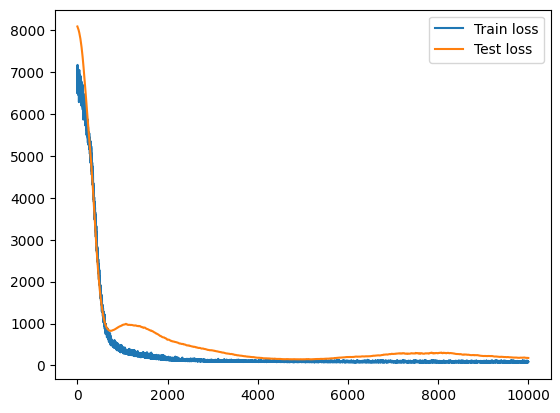

In [21]:
plt.plot(range(num_epochs),losses,label='Train loss')
plt.plot(range(num_epochs),test_losses,label='Test loss')
plt.legend()
plt.show()

In [23]:
feature_names=list(X_train.columns)

In [52]:
X_test_scaled_tensor = torch.from_numpy(X_test_scaled).float()  # Convert to tensor and ensure it is of type float

output = model.forward(X_test_scaled_tensor).detach().numpy()

In [55]:

# Calcul du coefficient de détermination (R²)
ridge_r2_score = r2_score(y_test, output)
print("Coefficient de détermination (R²) sur les données de test :", ridge_r2_score)

# Calcul de l'erreur absolue moyenne (MAE)
ridge_mae = mean_absolute_error(y_test, output)
print("Erreur absolue moyenne (MAE) sur les données de test:", ridge_mae)

# Calcul de l'erreur quadratique moyenne logarithmique (MSLE)
ridge_msle = mean_squared_log_error(y_test, output)
print("Erreur quadratique moyenne logarithmique (MSLE) sur les données de test :", ridge_msle)

Coefficient de détermination (R²) sur les données de test : 0.134
Erreur absolue moyenne (MAE) sur les données de test: 9.13
Erreur quadratique moyenne logarithmique (MSLE) sur les données de test : 0.0128


In [24]:
import lime
import lime.lime_tabular

# Load the best model's state dictionary
best_model_path = 'best_model.pth'
model.load_state_dict(torch.load(best_model_path))

# Ensure the model is in evaluation mode
model.eval()

# Define the predict_wrapper function
def predict_wrapper(x):
    x = torch.tensor(x, dtype=torch.float32)
    return model(x).detach().numpy()

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled, 
    mode="regression",
    training_labels=y_train,
    feature_names=feature_names
)

# Select a sample from test data to explain
sample_idx = 0
sample = X_test_scaled[sample_idx]

# Generate an explanation for the selected sample
exp = explainer.explain_instance(sample, predict_wrapper, num_features=len(feature_names))

# Display the explanation results
exp.show_in_notebook()

In [25]:
df.loc[y_train.index]['Country']

138        Paraguay
193         Vietnam
32           Canada
1           Albania
116        Mongolia
           ...     
179           Tonga
28     Burkina Faso
155         Senegal
85      Ivory Coast
171          Sweden
Name: Country, Length: 103, dtype: object

In [26]:
df.loc[y_test.index]['Country']

132        Norway
7         Armenia
67         Greece
111    Mauritania
15        Belarus
76        Hungary
112     Mauritius
107      Maldives
78          India
16        Belgium
167         Spain
61         France
Name: Country, dtype: object

In [27]:
X_train_df=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution
0,0.339823,-0.424191,-0.290819,-0.370642,-0.468927,-0.253979,-0.157115,-0.245048,-0.556106,-0.236410,-0.442873,-0.577334
1,-4.760259,-0.504649,-0.236258,-0.370642,-0.508271,1.157001,-0.204697,0.395021,-0.791716,-0.063002,-0.540478,-0.500247
2,0.490812,0.912049,1.182348,2.229165,2.871854,-0.030168,5.886199,-0.019924,0.048286,0.809571,1.618345,0.609208
3,0.370473,-0.377243,-0.290819,-0.370642,-0.520124,-0.053846,-0.395621,-0.273080,-0.720009,-0.248117,-0.417448,-0.459090
4,0.113863,-0.442516,-0.290819,-0.370642,-0.531769,-0.714433,0.573139,-0.268733,-0.591960,-0.249522,-0.505766,-0.529421
...,...,...,...,...,...,...,...,...,...,...,...,...
98,-0.457065,-0.502331,-0.290819,-0.370642,-0.539232,-0.718701,-0.413289,-0.291782,0.222432,-0.257400,-0.510596,-0.365671
99,-0.825101,-0.488083,-0.290819,-0.370642,-0.233869,0.143420,-0.240750,-0.133758,0.370969,-0.247207,-0.669666,-0.634671
100,0.209064,-0.451239,-0.290819,-0.370642,-0.424257,-0.368597,-0.289642,-0.171272,0.560482,-0.242993,-0.636913,-0.589829
101,-0.230581,-0.428263,-0.290819,-0.370642,0.546604,-0.111038,-0.210299,-0.095337,-0.576594,-0.219473,-0.593681,-0.534035


In [28]:
X_train_df.set_index(y_train.index,inplace=True)

In [29]:
X_train_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution
138,0.339823,-0.424191,-0.290819,-0.370642,-0.468927,-0.253979,-0.157115,-0.245048,-0.556106,-0.236410,-0.442873,-0.577334
193,-4.760259,-0.504649,-0.236258,-0.370642,-0.508271,1.157001,-0.204697,0.395021,-0.791716,-0.063002,-0.540478,-0.500247
32,0.490812,0.912049,1.182348,2.229165,2.871854,-0.030168,5.886199,-0.019924,0.048286,0.809571,1.618345,0.609208
1,0.370473,-0.377243,-0.290819,-0.370642,-0.520124,-0.053846,-0.395621,-0.273080,-0.720009,-0.248117,-0.417448,-0.459090
116,0.113863,-0.442516,-0.290819,-0.370642,-0.531769,-0.714433,0.573139,-0.268733,-0.591960,-0.249522,-0.505766,-0.529421
...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.457065,-0.502331,-0.290819,-0.370642,-0.539232,-0.718701,-0.413289,-0.291782,0.222432,-0.257400,-0.510596,-0.365671
28,-0.825101,-0.488083,-0.290819,-0.370642,-0.233869,0.143420,-0.240750,-0.133758,0.370969,-0.247207,-0.669666,-0.634671
155,0.209064,-0.451239,-0.290819,-0.370642,-0.424257,-0.368597,-0.289642,-0.171272,0.560482,-0.242993,-0.636913,-0.589829
85,-0.230581,-0.428263,-0.290819,-0.370642,0.546604,-0.111038,-0.210299,-0.095337,-0.576594,-0.219473,-0.593681,-0.534035


In [30]:
X_train_df['Country']=df.loc[y_train.index]['Country']

In [31]:
X_train_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution,Country
138,0.339823,-0.424191,-0.290819,-0.370642,-0.468927,-0.253979,-0.157115,-0.245048,-0.556106,-0.236410,-0.442873,-0.577334,Paraguay
193,-4.760259,-0.504649,-0.236258,-0.370642,-0.508271,1.157001,-0.204697,0.395021,-0.791716,-0.063002,-0.540478,-0.500247,Vietnam
32,0.490812,0.912049,1.182348,2.229165,2.871854,-0.030168,5.886199,-0.019924,0.048286,0.809571,1.618345,0.609208,Canada
1,0.370473,-0.377243,-0.290819,-0.370642,-0.520124,-0.053846,-0.395621,-0.273080,-0.720009,-0.248117,-0.417448,-0.459090,Albania
116,0.113863,-0.442516,-0.290819,-0.370642,-0.531769,-0.714433,0.573139,-0.268733,-0.591960,-0.249522,-0.505766,-0.529421,Mongolia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.457065,-0.502331,-0.290819,-0.370642,-0.539232,-0.718701,-0.413289,-0.291782,0.222432,-0.257400,-0.510596,-0.365671,Tonga
28,-0.825101,-0.488083,-0.290819,-0.370642,-0.233869,0.143420,-0.240750,-0.133758,0.370969,-0.247207,-0.669666,-0.634671,Burkina Faso
155,0.209064,-0.451239,-0.290819,-0.370642,-0.424257,-0.368597,-0.289642,-0.171272,0.560482,-0.242993,-0.636913,-0.589829,Senegal
85,-0.230581,-0.428263,-0.290819,-0.370642,0.546604,-0.111038,-0.210299,-0.095337,-0.576594,-0.219473,-0.593681,-0.534035,Ivory Coast


In [32]:
X_test_df=pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution
0,0.276911,0.090407,0.473045,0.039854,-0.179495,-0.652638,-0.170067,-0.254317,0.278774,0.009953,3.453904,3.919490
1,0.566307,-0.461454,-0.236258,-0.370642,-0.460116,-0.219091,-0.394994,-0.273060,-0.883912,-0.250271,-0.483500,-0.107313
2,0.515977,0.810655,-0.181696,-0.096978,0.027495,-0.145409,-0.330500,-0.219516,-0.223178,-0.143527,0.220335,-0.284398
3,-0.513686,-0.491706,-0.290819,-0.370642,-0.463535,-0.687222,0.236573,-0.259366,-1.406352,-0.252746,-0.620884,-0.566426
4,0.440160,-0.233936,-0.127134,-0.233810,-0.088404,0.077991,-0.282772,-0.227911,0.058530,-0.220609,-0.368033,0.189547
5,0.385959,0.178972,0.527607,-0.370642,-0.292979,-0.356918,-0.355065,-0.225005,0.258286,-0.160846,0.143400,1.570811
6,0.091723,-0.439233,-0.290819,-0.370642,-0.528569,-0.657398,-0.412473,-0.283690,0.089261,-0.251544,-0.298257,-0.045679
7,-0.258891,-0.485524,-0.290819,-0.370642,-0.511107,-0.758751,-0.413571,-0.288863,-0.008056,-0.254856,-0.256056,-0.015737
8,0.268523,4.296750,0.254798,1.134509,1.527606,9.342565,1.660382,9.631201,0.073896,1.417129,-0.608443,-0.572567
9,0.314658,1.019196,0.309360,0.587182,0.309445,-0.434354,-0.394498,-0.210701,0.888288,0.061723,1.611217,0.358886


In [33]:
X_test_df.set_index(y_test.index,inplace=True)

In [34]:
X_test_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution
132,0.276911,0.090407,0.473045,0.039854,-0.179495,-0.652638,-0.170067,-0.254317,0.278774,0.009953,3.453904,3.919490
7,0.566307,-0.461454,-0.236258,-0.370642,-0.460116,-0.219091,-0.394994,-0.273060,-0.883912,-0.250271,-0.483500,-0.107313
67,0.515977,0.810655,-0.181696,-0.096978,0.027495,-0.145409,-0.330500,-0.219516,-0.223178,-0.143527,0.220335,-0.284398
111,-0.513686,-0.491706,-0.290819,-0.370642,-0.463535,-0.687222,0.236573,-0.259366,-1.406352,-0.252746,-0.620884,-0.566426
15,0.440160,-0.233936,-0.127134,-0.233810,-0.088404,0.077991,-0.282772,-0.227911,0.058530,-0.220609,-0.368033,0.189547
76,0.385959,0.178972,0.527607,-0.370642,-0.292979,-0.356918,-0.355065,-0.225005,0.258286,-0.160846,0.143400,1.570811
112,0.091723,-0.439233,-0.290819,-0.370642,-0.528569,-0.657398,-0.412473,-0.283690,0.089261,-0.251544,-0.298257,-0.045679
107,-0.258891,-0.485524,-0.290819,-0.370642,-0.511107,-0.758751,-0.413571,-0.288863,-0.008056,-0.254856,-0.256056,-0.015737
78,0.268523,4.296750,0.254798,1.134509,1.527606,9.342565,1.660382,9.631201,0.073896,1.417129,-0.608443,-0.572567
16,0.314658,1.019196,0.309360,0.587182,0.309445,-0.434354,-0.394498,-0.210701,0.888288,0.061723,1.611217,0.358886


In [35]:
X_test_df['Country']=df.loc[y_test.index]['Country']

In [36]:
X_test_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution,Country
132,0.276911,0.090407,0.473045,0.039854,-0.179495,-0.652638,-0.170067,-0.254317,0.278774,0.009953,3.453904,3.919490,Norway
7,0.566307,-0.461454,-0.236258,-0.370642,-0.460116,-0.219091,-0.394994,-0.273060,-0.883912,-0.250271,-0.483500,-0.107313,Armenia
67,0.515977,0.810655,-0.181696,-0.096978,0.027495,-0.145409,-0.330500,-0.219516,-0.223178,-0.143527,0.220335,-0.284398,Greece
111,-0.513686,-0.491706,-0.290819,-0.370642,-0.463535,-0.687222,0.236573,-0.259366,-1.406352,-0.252746,-0.620884,-0.566426,Mauritania
15,0.440160,-0.233936,-0.127134,-0.233810,-0.088404,0.077991,-0.282772,-0.227911,0.058530,-0.220609,-0.368033,0.189547,Belarus
76,0.385959,0.178972,0.527607,-0.370642,-0.292979,-0.356918,-0.355065,-0.225005,0.258286,-0.160846,0.143400,1.570811,Hungary
112,0.091723,-0.439233,-0.290819,-0.370642,-0.528569,-0.657398,-0.412473,-0.283690,0.089261,-0.251544,-0.298257,-0.045679,Mauritius
107,-0.258891,-0.485524,-0.290819,-0.370642,-0.511107,-0.758751,-0.413571,-0.288863,-0.008056,-0.254856,-0.256056,-0.015737,Maldives
78,0.268523,4.296750,0.254798,1.134509,1.527606,9.342565,1.660382,9.631201,0.073896,1.417129,-0.608443,-0.572567,India
16,0.314658,1.019196,0.309360,0.587182,0.309445,-0.434354,-0.394498,-0.210701,0.888288,0.061723,1.611217,0.358886,Belgium


In [37]:
# Assuming X_test_df and X_train_df are already defined
X_combined_df = pd.concat([X_test_df, X_train_df], axis=0)

# Reset the index if you want to have a continuous index after merging
X_combined_df.reset_index(drop=True, inplace=True)

In [38]:
X_combined_df

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution,Country
0,0.276911,0.090407,0.473045,0.039854,-0.179495,-0.652638,-0.170067,-0.254317,0.278774,0.009953,3.453904,3.919490,Norway
1,0.566307,-0.461454,-0.236258,-0.370642,-0.460116,-0.219091,-0.394994,-0.273060,-0.883912,-0.250271,-0.483500,-0.107313,Armenia
2,0.515977,0.810655,-0.181696,-0.096978,0.027495,-0.145409,-0.330500,-0.219516,-0.223178,-0.143527,0.220335,-0.284398,Greece
3,-0.513686,-0.491706,-0.290819,-0.370642,-0.463535,-0.687222,0.236573,-0.259366,-1.406352,-0.252746,-0.620884,-0.566426,Mauritania
4,0.440160,-0.233936,-0.127134,-0.233810,-0.088404,0.077991,-0.282772,-0.227911,0.058530,-0.220609,-0.368033,0.189547,Belarus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,-0.457065,-0.502331,-0.290819,-0.370642,-0.539232,-0.718701,-0.413289,-0.291782,0.222432,-0.257400,-0.510596,-0.365671,Tonga
111,-0.825101,-0.488083,-0.290819,-0.370642,-0.233869,0.143420,-0.240750,-0.133758,0.370969,-0.247207,-0.669666,-0.634671,Burkina Faso
112,0.209064,-0.451239,-0.290819,-0.370642,-0.424257,-0.368597,-0.289642,-0.171272,0.560482,-0.242993,-0.636913,-0.589829,Senegal
113,-0.230581,-0.428263,-0.290819,-0.370642,0.546604,-0.111038,-0.210299,-0.095337,-0.576594,-0.219473,-0.593681,-0.534035,Ivory Coast


In [56]:
#X_combined_df.to_csv("Dashboard_data_regression.csv", index=False)

In [40]:
y_df=pd.concat([y_train, y_test], axis=0)

In [41]:
y_df.to_csv("Dashboard_data_regression.csv", index=False)
y_df.reset_index(drop=True, inplace=True)
y_df

0      84.04
1      89.53
2      99.52
3      81.75
4      91.03
       ...  
110    80.54
111    76.24
112    97.49
113    93.90
114    96.69
Name: Averageiqbycountry_Iqlynnbecker2019, Length: 115, dtype: float64

In [42]:
#y_df.to_csv("Dashboard_data_regression_y.csv", index=False)